In [1]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.models import Model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
VGG=K.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [3]:
#VGG.summary()
poolindices=[3,6,11,16,21]

x=VGG.layers[0].output
for i in range(1,len(VGG.layers)):
    if i in poolindices:
        #print(VGG.layers[i].pool_size)
        x=K.layers.AveragePooling2D()(x)
    else:
        x=VGG.layers[i](x)
    VGG.layers[i].trainable=False

VGG = Model(inputs=VGG.layers[0].input, outputs=x)
VGG.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
average_pooling2d_1 (Average (None, None, None, 128)   0     

In [4]:
VGG.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
average_pooling2d_1 (Average (None, None, None, 128)   0     

In [5]:
outputs = [x.output for x in VGG.layers]
interVGG=tf.keras.Model([VGG.input], outputs)

In [6]:
im=Image.open('./deepstyle/macsek.jpg')
im=np.array(im.resize((244,244))).astype(np.float32).reshape(1,244,244,3)
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(im)
pred=interVGG.predict(im)
'''
plt.figure(figsize=(30,30))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(pred[1][:,:,:,i].reshape((244,244)))
plt.show()
'''

layernum=14
targetact=pred[layernum].copy()
whiteim=np.random.rand(1,244,244,3).astype(np.float32)
img=tf.Variable(whiteim)

In [6]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

def contentloss(x, y):
    return tf.reduce_mean((x-y)**2)
    #return tf.divide(tf.reduce_sum(tf.square(tf.subtract(x,y))),2)


optimizer=tf.optimizers.Adam(0.0001)
def contentopt(img,targetact,layernum):
    with tf.GradientTape() as g:
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(img*255.0)
        pred=interVGG(preprocessed_input)
        whiteact=pred[layernum]
        loss=contentloss(whiteact,targetact)
        
    
    #trainablevar=img
    gradients = g.gradient(loss,img)
    #print(gradients)
    print(loss)
    optimizer.apply_gradients([(gradients, img)])
    return img
    
    




tf.Tensor(154150.47, shape=(), dtype=float32)
tf.Tensor(153912.38, shape=(), dtype=float32)
tf.Tensor(153675.69, shape=(), dtype=float32)
tf.Tensor(153440.31, shape=(), dtype=float32)
tf.Tensor(153206.2, shape=(), dtype=float32)
tf.Tensor(152973.31, shape=(), dtype=float32)
tf.Tensor(152741.97, shape=(), dtype=float32)
tf.Tensor(152511.86, shape=(), dtype=float32)
tf.Tensor(152282.77, shape=(), dtype=float32)
tf.Tensor(152054.89, shape=(), dtype=float32)
tf.Tensor(151828.31, shape=(), dtype=float32)
tf.Tensor(151603.1, shape=(), dtype=float32)
tf.Tensor(151379.11, shape=(), dtype=float32)
tf.Tensor(151156.34, shape=(), dtype=float32)
tf.Tensor(150934.83, shape=(), dtype=float32)
tf.Tensor(150714.56, shape=(), dtype=float32)
tf.Tensor(150495.53, shape=(), dtype=float32)
tf.Tensor(150277.89, shape=(), dtype=float32)
tf.Tensor(150061.62, shape=(), dtype=float32)
tf.Tensor(149846.56, shape=(), dtype=float32)
tf.Tensor(149632.69, shape=(), dtype=float32)
tf.Tensor(149419.97, shape=(), dtype

tf.Tensor(125857.82, shape=(), dtype=float32)
tf.Tensor(125749.9, shape=(), dtype=float32)
tf.Tensor(125642.31, shape=(), dtype=float32)
tf.Tensor(125534.836, shape=(), dtype=float32)
tf.Tensor(125427.625, shape=(), dtype=float32)
tf.Tensor(125320.67, shape=(), dtype=float32)
tf.Tensor(125214.05, shape=(), dtype=float32)
tf.Tensor(125107.7, shape=(), dtype=float32)
tf.Tensor(125001.555, shape=(), dtype=float32)
tf.Tensor(124895.59, shape=(), dtype=float32)
tf.Tensor(124790.04, shape=(), dtype=float32)
tf.Tensor(124684.875, shape=(), dtype=float32)
tf.Tensor(124580.14, shape=(), dtype=float32)
tf.Tensor(124475.805, shape=(), dtype=float32)
tf.Tensor(124371.81, shape=(), dtype=float32)
tf.Tensor(124268.06, shape=(), dtype=float32)
tf.Tensor(124164.664, shape=(), dtype=float32)
tf.Tensor(124061.55, shape=(), dtype=float32)
tf.Tensor(123958.7, shape=(), dtype=float32)
tf.Tensor(123856.14, shape=(), dtype=float32)
tf.Tensor(123753.914, shape=(), dtype=float32)
tf.Tensor(123652.016, shape=()

tf.Tensor(109783.68, shape=(), dtype=float32)
tf.Tensor(109707.21, shape=(), dtype=float32)
tf.Tensor(109630.8, shape=(), dtype=float32)
tf.Tensor(109554.53, shape=(), dtype=float32)
tf.Tensor(109478.47, shape=(), dtype=float32)
tf.Tensor(109402.516, shape=(), dtype=float32)
tf.Tensor(109326.625, shape=(), dtype=float32)
tf.Tensor(109250.78, shape=(), dtype=float32)
tf.Tensor(109175.09, shape=(), dtype=float32)
tf.Tensor(109099.54, shape=(), dtype=float32)
tf.Tensor(109024.086, shape=(), dtype=float32)
tf.Tensor(108948.79, shape=(), dtype=float32)
tf.Tensor(108873.66, shape=(), dtype=float32)
tf.Tensor(108798.63, shape=(), dtype=float32)
tf.Tensor(108723.664, shape=(), dtype=float32)
tf.Tensor(108648.77, shape=(), dtype=float32)
tf.Tensor(108574.055, shape=(), dtype=float32)
tf.Tensor(108499.375, shape=(), dtype=float32)
tf.Tensor(108424.71, shape=(), dtype=float32)
tf.Tensor(108350.15, shape=(), dtype=float32)
tf.Tensor(108275.74, shape=(), dtype=float32)
tf.Tensor(108201.46, shape=()

W1006 22:45:56.563898 43456 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(100186.48, shape=(), dtype=float32)
tf.Tensor(100123.914, shape=(), dtype=float32)


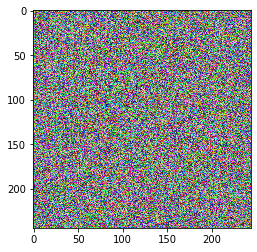

In [8]:
for i in range(500):
    cucc=contentopt(img,targetact,layernum)
    
plt.imshow(img.numpy().reshape(244,244,3)[:,:,::-1])
plt.show()


In [48]:
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

In [119]:
im=Image.open('./deepstyle/csillag.jpg')
im=np.array(im.resize((244,244))).astype(np.float32).reshape(1,244,244,3)
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(im)
pred=interVGG.predict(preprocessed_input)

styleidx=[1,4,7,12,17]
tstyles=[gram_matrix(tf.Variable(pred[i].copy())) for i in styleidx]
whiteim=np.random.rand(1,244,244,3).astype(np.float32)*0.1+0.5
img=tf.Variable(whiteim)

In [129]:
def styleloss(layerstyles,targetstyles):
    return tf.add_n([tf.reduce_mean((layerstyles[i]-targetstyles[i])**2) 
                           for i in range(len(layerstyles))])


optimizer=tf.optimizers.Adam(0.0005)

def styleopt(img,tstyles,styleidx):
    with tf.GradientTape() as g:
        #print(np.max(img.numpy()))
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(img*255.0)
        #print(np.max(preprocessed_input))
        pred=interVGG(preprocessed_input)
        wstyles=[gram_matrix(pred[i]) for i in styleidx]
        loss=styleloss(wstyles,tstyles)
        
    
    #trainablevar=img
    gradients = g.gradient(loss,img)
    #print(gradients)
    print(loss)
    optimizer.apply_gradients([(gradients, img)])
    #print(np.max(img.numpy()))
    img.assign(clip_0_1(img))
    return img
    

tf.Tensor(237159140.0, shape=(), dtype=float32)
tf.Tensor(237223170.0, shape=(), dtype=float32)
tf.Tensor(237350370.0, shape=(), dtype=float32)
tf.Tensor(237355760.0, shape=(), dtype=float32)
tf.Tensor(237182980.0, shape=(), dtype=float32)
tf.Tensor(236892380.0, shape=(), dtype=float32)
tf.Tensor(236585980.0, shape=(), dtype=float32)
tf.Tensor(236342340.0, shape=(), dtype=float32)
tf.Tensor(236183500.0, shape=(), dtype=float32)
tf.Tensor(236090990.0, shape=(), dtype=float32)
tf.Tensor(236025200.0, shape=(), dtype=float32)
tf.Tensor(235945020.0, shape=(), dtype=float32)
tf.Tensor(235821250.0, shape=(), dtype=float32)
tf.Tensor(235645060.0, shape=(), dtype=float32)
tf.Tensor(235445400.0, shape=(), dtype=float32)
tf.Tensor(235260060.0, shape=(), dtype=float32)
tf.Tensor(235118940.0, shape=(), dtype=float32)
tf.Tensor(235015620.0, shape=(), dtype=float32)
tf.Tensor(234916660.0, shape=(), dtype=float32)
tf.Tensor(234790690.0, shape=(), dtype=float32)
tf.Tensor(234629040.0, shape=(), dtype=f

tf.Tensor(217267860.0, shape=(), dtype=float32)
tf.Tensor(217148860.0, shape=(), dtype=float32)
tf.Tensor(217040080.0, shape=(), dtype=float32)
tf.Tensor(216943140.0, shape=(), dtype=float32)
tf.Tensor(216854180.0, shape=(), dtype=float32)
tf.Tensor(216768270.0, shape=(), dtype=float32)
tf.Tensor(216683570.0, shape=(), dtype=float32)
tf.Tensor(216604930.0, shape=(), dtype=float32)
tf.Tensor(216545070.0, shape=(), dtype=float32)
tf.Tensor(216528620.0, shape=(), dtype=float32)
tf.Tensor(216595620.0, shape=(), dtype=float32)
tf.Tensor(216811020.0, shape=(), dtype=float32)
tf.Tensor(217265630.0, shape=(), dtype=float32)
tf.Tensor(218054190.0, shape=(), dtype=float32)
tf.Tensor(219185200.0, shape=(), dtype=float32)
tf.Tensor(220408400.0, shape=(), dtype=float32)
tf.Tensor(220984260.0, shape=(), dtype=float32)
tf.Tensor(220055890.0, shape=(), dtype=float32)
tf.Tensor(217810300.0, shape=(), dtype=float32)
tf.Tensor(215822960.0, shape=(), dtype=float32)
tf.Tensor(215585630.0, shape=(), dtype=f

tf.Tensor(201773980.0, shape=(), dtype=float32)
tf.Tensor(201714960.0, shape=(), dtype=float32)
tf.Tensor(201597920.0, shape=(), dtype=float32)
tf.Tensor(201430820.0, shape=(), dtype=float32)
tf.Tensor(201248900.0, shape=(), dtype=float32)
tf.Tensor(201098670.0, shape=(), dtype=float32)
tf.Tensor(201003710.0, shape=(), dtype=float32)
tf.Tensor(200954420.0, shape=(), dtype=float32)
tf.Tensor(200919650.0, shape=(), dtype=float32)
tf.Tensor(200869710.0, shape=(), dtype=float32)
tf.Tensor(200791070.0, shape=(), dtype=float32)
tf.Tensor(200686500.0, shape=(), dtype=float32)
tf.Tensor(200570700.0, shape=(), dtype=float32)
tf.Tensor(200462270.0, shape=(), dtype=float32)
tf.Tensor(200376580.0, shape=(), dtype=float32)
tf.Tensor(200319330.0, shape=(), dtype=float32)
tf.Tensor(200290600.0, shape=(), dtype=float32)
tf.Tensor(200287500.0, shape=(), dtype=float32)
tf.Tensor(200312460.0, shape=(), dtype=float32)
tf.Tensor(200375380.0, shape=(), dtype=float32)
tf.Tensor(200499420.0, shape=(), dtype=f

tf.Tensor(188946200.0, shape=(), dtype=float32)
tf.Tensor(188882270.0, shape=(), dtype=float32)
tf.Tensor(188809980.0, shape=(), dtype=float32)
tf.Tensor(188737950.0, shape=(), dtype=float32)
tf.Tensor(188662110.0, shape=(), dtype=float32)
tf.Tensor(188575520.0, shape=(), dtype=float32)
tf.Tensor(188464270.0, shape=(), dtype=float32)
tf.Tensor(188325890.0, shape=(), dtype=float32)
tf.Tensor(188167380.0, shape=(), dtype=float32)
tf.Tensor(188013140.0, shape=(), dtype=float32)
tf.Tensor(187888780.0, shape=(), dtype=float32)
tf.Tensor(187807940.0, shape=(), dtype=float32)
tf.Tensor(187765570.0, shape=(), dtype=float32)
tf.Tensor(187743630.0, shape=(), dtype=float32)
tf.Tensor(187722640.0, shape=(), dtype=float32)
tf.Tensor(187691600.0, shape=(), dtype=float32)
tf.Tensor(187651360.0, shape=(), dtype=float32)
tf.Tensor(187611900.0, shape=(), dtype=float32)
tf.Tensor(187590690.0, shape=(), dtype=float32)
tf.Tensor(187601940.0, shape=(), dtype=float32)
tf.Tensor(187660180.0, shape=(), dtype=f

tf.Tensor(178475410.0, shape=(), dtype=float32)
tf.Tensor(178610110.0, shape=(), dtype=float32)
tf.Tensor(178790020.0, shape=(), dtype=float32)
tf.Tensor(178975780.0, shape=(), dtype=float32)
tf.Tensor(179110740.0, shape=(), dtype=float32)
tf.Tensor(179106820.0, shape=(), dtype=float32)
tf.Tensor(178908160.0, shape=(), dtype=float32)
tf.Tensor(178527980.0, shape=(), dtype=float32)
tf.Tensor(178054960.0, shape=(), dtype=float32)
tf.Tensor(177644050.0, shape=(), dtype=float32)
tf.Tensor(177410050.0, shape=(), dtype=float32)
tf.Tensor(177376460.0, shape=(), dtype=float32)
tf.Tensor(177472180.0, shape=(), dtype=float32)
tf.Tensor(177587170.0, shape=(), dtype=float32)
tf.Tensor(177633730.0, shape=(), dtype=float32)
tf.Tensor(177568770.0, shape=(), dtype=float32)
tf.Tensor(177398580.0, shape=(), dtype=float32)
tf.Tensor(177171680.0, shape=(), dtype=float32)
tf.Tensor(176961540.0, shape=(), dtype=float32)
tf.Tensor(176829310.0, shape=(), dtype=float32)
tf.Tensor(176792720.0, shape=(), dtype=f

tf.Tensor(168880720.0, shape=(), dtype=float32)
tf.Tensor(168832100.0, shape=(), dtype=float32)
tf.Tensor(168783440.0, shape=(), dtype=float32)
tf.Tensor(168734740.0, shape=(), dtype=float32)
tf.Tensor(168685950.0, shape=(), dtype=float32)
tf.Tensor(168637340.0, shape=(), dtype=float32)
tf.Tensor(168588380.0, shape=(), dtype=float32)
tf.Tensor(168539730.0, shape=(), dtype=float32)
tf.Tensor(168491260.0, shape=(), dtype=float32)
tf.Tensor(168443090.0, shape=(), dtype=float32)
tf.Tensor(168395310.0, shape=(), dtype=float32)
tf.Tensor(168348220.0, shape=(), dtype=float32)
tf.Tensor(168302190.0, shape=(), dtype=float32)
tf.Tensor(168257780.0, shape=(), dtype=float32)
tf.Tensor(168216130.0, shape=(), dtype=float32)
tf.Tensor(168178350.0, shape=(), dtype=float32)
tf.Tensor(168146260.0, shape=(), dtype=float32)
tf.Tensor(168122610.0, shape=(), dtype=float32)
tf.Tensor(168110610.0, shape=(), dtype=float32)
tf.Tensor(168115020.0, shape=(), dtype=float32)
tf.Tensor(168138980.0, shape=(), dtype=f

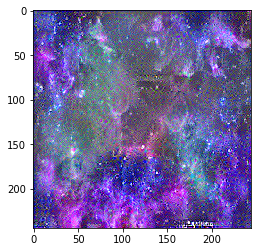

In [131]:
for i in range(1000):
    cucc=styleopt(img,tstyles,styleidx)
    
plt.imshow((img.numpy().reshape(244,244,3)))
plt.show()


In [6]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

def contentloss(x, y):
    return tf.reduce_mean((x-y)**2)
    #return tf.divide(tf.reduce_sum(tf.square(tf.subtract(x,y))),2)


def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

def styleloss(layerstyles,targetstyles):
    return tf.add_n([tf.reduce_mean((layerstyles[i]-targetstyles[i])**2) 
                           for i in range(len(layerstyles))])


def styleopt(img,tstyles,styleidx):
    with tf.GradientTape() as g:
        #print(np.max(img.numpy()))
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(img*255.0)
        #print(np.max(preprocessed_input))
        pred=interVGG(preprocessed_input)
        wstyles=[gram_matrix(pred[i]) for i in styleidx]
        loss=styleloss(wstyles,tstyles)
        
    
    #trainablevar=img
    gradients = g.gradient(loss,img)
    #print(gradients)
    print(loss)
    optimizer.apply_gradients([(gradients, img)])
    #print(np.max(img.numpy()))
    img.assign(clip_0_1(img))
    return img
    

In [100]:
psize=350

im=Image.open('./deepstyle/csillag.jpg')
im=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(im)
pred=interVGG.predict(preprocessed_input)

styleidx=[1,4,7,12,17]
tstyles=[gram_matrix(tf.Variable(pred[i].copy())) for i in styleidx]
whiteim=np.random.rand(1,psize,psize,3).astype(np.float32)
img=tf.Variable(whiteim)



im=Image.open('./deepstyle/gergo.jpg')
im=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(im)
pred=interVGG.predict(preprocessed_input)

layernum=12
targetact=pred[layernum].copy()
#whiteim=np.random.rand(1,244,244,3).astype(np.float32)
im=Image.open('./deepstyle/gergo.jpg')
whiteim=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)[:,:,:,::-1]/255.0
img=tf.Variable(whiteim)




In [108]:
acont=1e1
astyle=1e-1
avar=0
optimizer=tf.optimizers.Adam(0.001)

def mergeopt(img,acont,astyle,tstyles,styleidx,targetact,layernum):
    with tf.GradientTape() as g:
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(img*255)
        pred=interVGG(preprocessed_input)
        wstyles=[gram_matrix(pred[i]) for i in styleidx]
        whiteact=pred[layernum]
        loss=astyle*styleloss(wstyles,tstyles)/len(styleidx)+acont*contentloss(whiteact,targetact)
        
    
    #trainablevar=img
    gradients = g.gradient(loss,img)
    #print(gradients)
    #print(loss)
    optimizer.apply_gradients([(gradients, img)])
    img.assign(clip_0_1(img))
    return loss

tf.Tensor(17017544.0, shape=(), dtype=float32)
tf.Tensor(16360151.0, shape=(), dtype=float32)
tf.Tensor(16187430.0, shape=(), dtype=float32)
tf.Tensor(16032186.0, shape=(), dtype=float32)


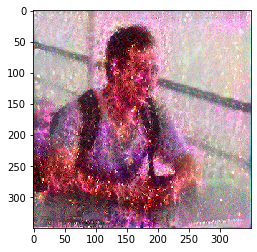

In [109]:
with tf.device('/GPU:0'):
    for i in range(200):
        cucc=mergeopt(img,acont,astyle,tstyles,styleidx,targetact,layernum)
        if i % 50==0:
            print(cucc)

    plt.imshow((img.numpy().reshape(psize,psize,3)[:,:,::-1]))
    plt.show()
    saveimage = Image.fromarray((img.numpy().reshape(psize,psize,3)[:,:,::-1]*255).astype('uint8'), 'RGB')
    saveimage.save('./deepstyle/result.jpg')